In [1]:
from keras.layers import Activation

2021-12-18 09:28:33.528618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-18 09:28:33.528703: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
z = np.linspace(-7, 7, 400)

# sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# derivative
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

#



In [4]:
def plot_activation(name, g_z, d_g_z, lims):

   plt.figure(figsize=(11,4))

   plt.subplot(1,2,1)
   # coordinate 
   plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
   plt.plot([-5, 5], [-1, -1], 'k--', linewidth=1)
   plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
   plt.plot([-7,7], [1,1], 'k--', linewidth=1)
   # Plot function
   plt.plot(z, g_z, "b-", linewidth=2, label=name)
   plt.grid(True)
   plt.title(name + " activation function", fontsize=14)
   plt.axis(lims)

   plt.subplot(1,2,2)
   plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
   plt.plot([-5, 5], [-1, -1], 'k--', linewidth=1)
   plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
   plt.plot(z, d_g_z, "b-", linewidth=2, label=name)
   plt.grid(True)
   plt.title(name + " Derivative", fontsize=14)
   plt.axis(lims)
   plt.show()
   return

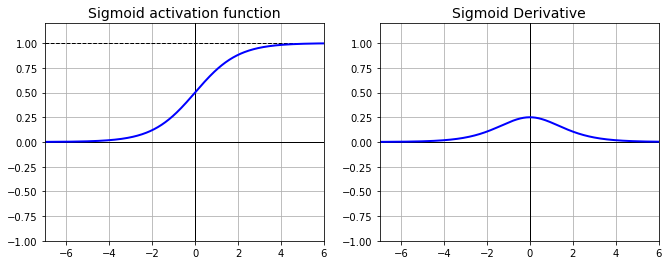

In [5]:
plot_activation('Sigmoid', sigmoid(z), derivative(sigmoid, z), list([-7, 6, -1, 1.2]))

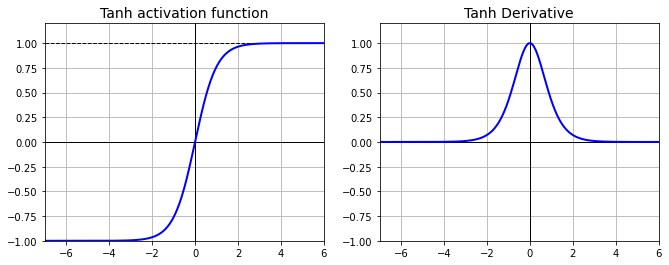

In [6]:
plot_activation('Tanh', np.tanh(z), derivative(np.tanh, z),list([-7, 6, -1, 1.2]))

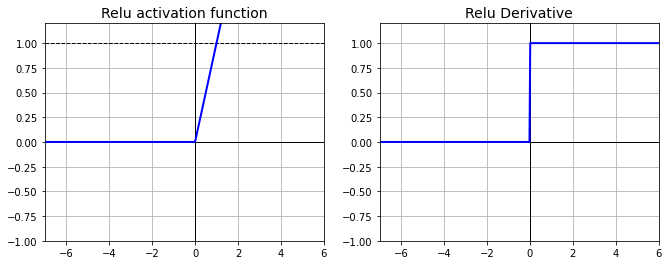

In [7]:
# relu
def relu(z):
    return np.maximum(0, z)

plot_activation('Relu', relu(z), derivative(relu, z), list([-7, 6, -1, 1.2]))

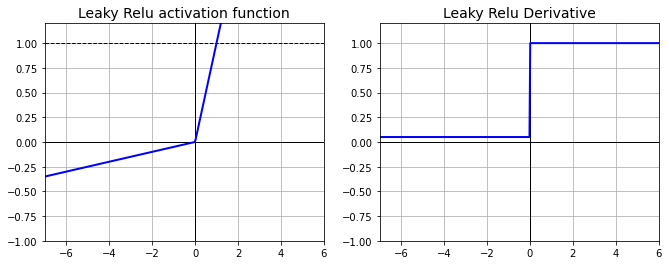

In [8]:
#leaky relu
def leaky_relu(z, alpha=0.05):
    return np.maximum(alpha * z, z)
plot_activation('Leaky Relu', leaky_relu(z), derivative(leaky_relu, z),list([-7, 6, -1, 1.2]))

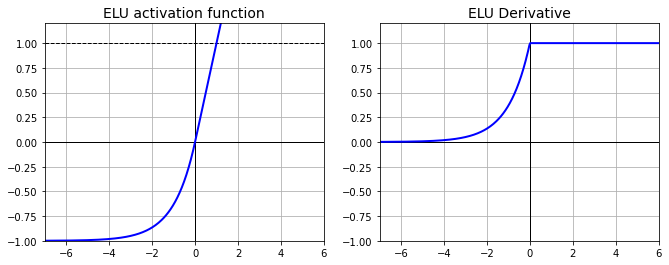

In [9]:
# ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plot_activation('ELU', elu(z), derivative(elu, z), list([-7, 6, -1, 1.2]))

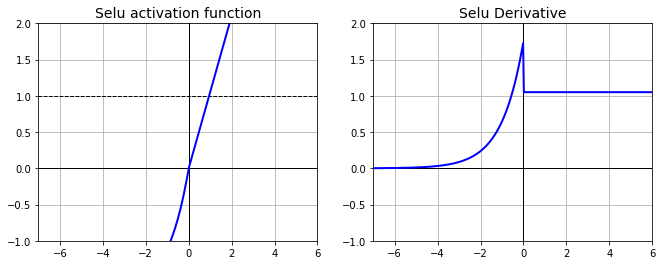

In [10]:
# Selu
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plot_activation('Selu', selu(z), derivative(selu, z), list([-7, 6, -1, 2]))

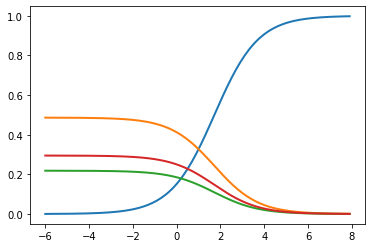

In [30]:
"""Softmax."""
# Softmax is a different function, and cannot be represented by a simple line
# is a function that turns a vector of K real values into a vector of K real values that sum to 1.

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=0)


# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-6.0, 8.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x), 0.5* np.ones_like(x)])



plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

/home/manero/DL/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


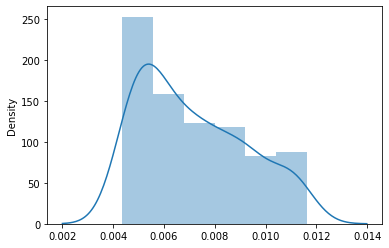

In [28]:
import seaborn as sns
x = np.arange(-6.0, 8.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x), 0.5* np.ones_like(x)])

y=softmax(np.random.rand(140))

sns.distplot(y)
plt.show()